In [1]:
%config Application.log_level="DEBUG"
from easyimages import EasyImage, EasyImageList, bbox
import torch
import torchvision
from torchvision import transforms
import PIL

# EasyImage()


####  image from file

EasyImageObject: img_00000002.jpg | labels: ['Person'] | downloaded: True | size: (205, 300) |


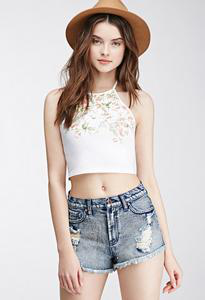

In [2]:
# in this context lazy means the object will store the metadata only and will not open the file yet
image1 = EasyImage.from_file('./tests/test_data/image_folder/img_00000002.jpg',label=['Person'], lazy=True)
image1.show()

####  image from url


EasyImageObject: KDBRjyv.png | labels: [] | downloaded: True | size: (237, 212) |


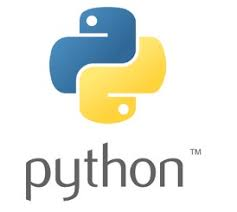

In [3]:
image2 = EasyImage.from_url('https://imgur.com/KDBRjyv.png')
image2.show()

####  image from torch-like

EasyImageObject: 5df446bd.jpg | labels: [] | downloaded: True | size: (170, 250) |


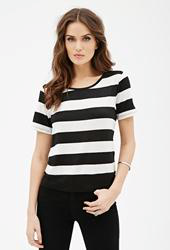

In [4]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

Trans = torchvision.transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=MEAN, std=STD),
        ])
torch_image = Trans(PIL.Image.open('./tests/test_data/image_folder/img_00000003.jpg'))


image3  = EasyImage.from_torch(torch_image, mean=MEAN, std=STD)
image3.show()

#### Draw label on image

EasyImageObject: img_00000002.jpg | labels: ['Person'] | downloaded: True | size: (205, 300) |


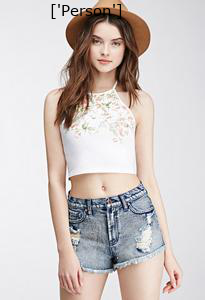

In [5]:
image1.draw_label(font_size=15).show()

EasyImageObject: KDBRjyv.png | labels: [] | downloaded: True | size: (324, 291) |


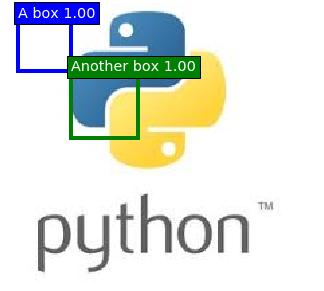

In [6]:
image2.boxes = [bbox(10, 10, 50, 50, 1, 'A box'), 
                bbox(50, 50, 100, 100, 1, 'Another box')]
image2.draw_boxes().show()

# EasyImageList()
Now it will get more exciting


In [7]:
easy_list = EasyImageList.from_multilevel_folder('./tests/test_data/hierarchy_images/')
easy_list

<ImageList with 6 EasyImages>

In [8]:
# html grids are very fast and suited for visualizing huge datasets (examples bellow)
easy_list.visualize_grid_html()

TypeError: visualize_grid_html() missing 1 required positional argument: 'images'

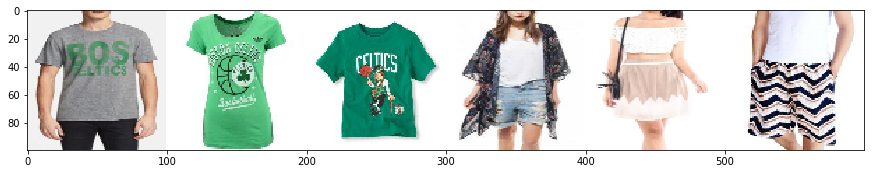

In [9]:
# sometimes its handy to have a numpy array like image
r = easy_list.visualize_grid_numpy()

#### visualize a big dataset

In [10]:
easy_list.images = easy_list.images*100

In [18]:
# this is super snappy and responsive
easy_list.to_html()

Drawing Zig_Zag-Patterned_Shorts


Drawing Boston_Celtics_Graphic_Tee


# show EasyImage in CLI (iterm)

```python
import easyimages
im1 = easyimages.EasyImage.from_file('tests/test_data/image_folder/img_00000002.jpg', lazy=False)
im1.show(inline=True)
````

EasyImageObject: easy_cli.png | labels: [] | downloaded: True | size: (1718, 878) |


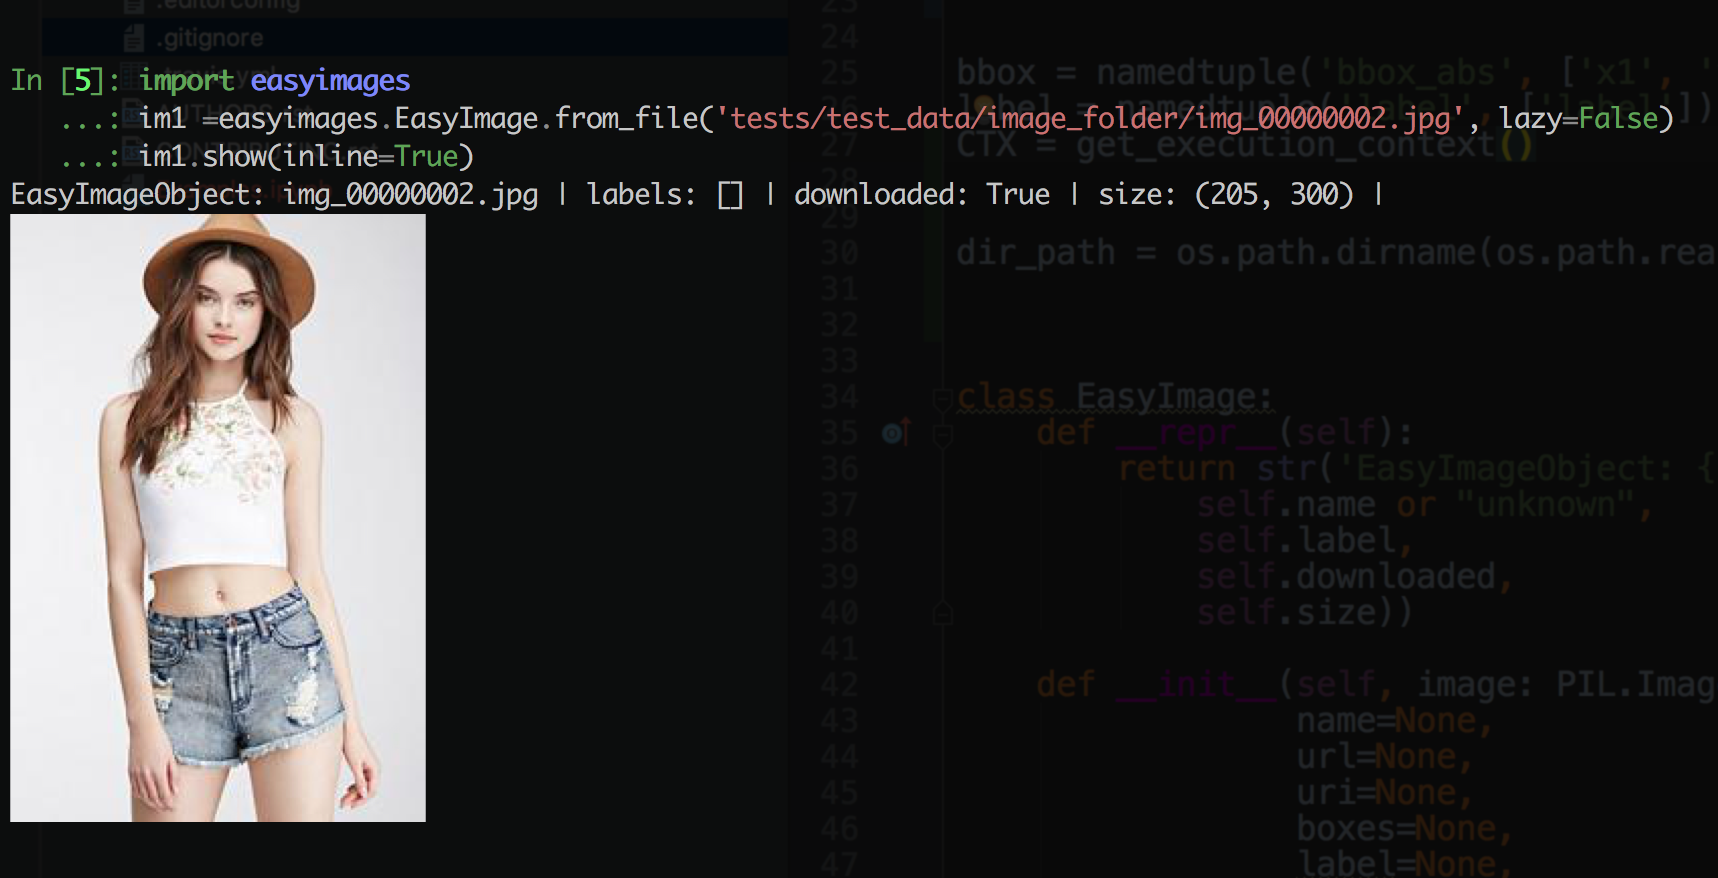

In [12]:
EasyImage.from_file('./easy_cli.png').show()

In [21]:
# since we dont actually need to open the files to look at them we can use lazy=True here making it super-fast
easy_list_hier= EasyImageList.from_multilevel_folder('./tests/test_data/hierarchy_images/', lazy=True)

In [20]:
easy_list_hier.to_html(by_class=True)

Drawing Zig_Zag-Patterned_Shorts


Drawing Boston_Celtics_Graphic_Tee


In [17]:
easy_list_hier.to_html(by_class=False)